# <img src="ups.png">

### Nombre: Fanny Gutama
### Docente: Ing. Diego Quisi


# <div align="center"> Examen


# Objetivo:

Consolidar los conocimientos adquiridos en clase para desarrollar simulaciones de eventos.

# Introducción

El golpe económico de la crisis sanitaria del corona virus no va a ser cosa de semanas, sino de meses. Dentro de una de las etapas importantes que están a la vuelta de la esquina son las elecciones presidenciales y asambleístas del Ecuador. Para ello se plantea realizar un sistema de regresión que permita identificar cual es la tendencia de los votos en base al manejo de las redes sociales (Twitter y/o Facebook) [1].

Las regresiones lineales pueden aprenden por sí mismos y en este caso obtener automáticamente esa “recta” que buscamos con la tendencia de predicción. Para hacerlo se mide el error con respecto a los puntos de entrada y el valor “Y” de salida real [3].


# Enunciado

*	Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real:
*	Obtener datos de tendencia de twitter o facebook, para ello se puede obtener a través del API [4].
*	Title: Titulo del Post/Twitter
*	Word count: la cantidad de palabras del artículo,
*	numero of Links: los enlaces externos que contiene,
*	numero of comments: cantidad de comentarios,
*	numero Shares: compartidos.
*	HashTag
*	Etc.


## Importamos las librerias

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from facebook_scraper import get_posts
import numpy as np
import seaborn as sb
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Metodo para contar las palabras del post obtenido a nivel de candidatos presidenciales debido a que los datos obtenidos para los asambleistas del azuay son muy pocos los que se pudo obtener.

In [3]:
def contador(post):
    cont=0
    for char in post:        
            cont+=1
    return cont
publi = [] 
# Obtenemos la información de las publicaciones
for post in get_posts('PaulErnestoCarrascoC', pages=10):
        post['Word count'] = len(post['text'])
        publi.append(post)          
facebook_posts = pd.DataFrame(publi)
facebook_posts.describe()

,likes,comments,shares,Word count
count,38.000000,38.000000,38.000000,38.000000
mean,258.315789,30.763158,5.789474,197.684211
std,827.583265,80.911842,23.547718,118.371176
min,9.000000,0.000000,0.000000,0.000000
25%,13.250000,0.000000,0.000000,125.500000
50%,19.500000,2.000000,0.000000,189.000000
75%,83.250000,28.500000,0.000000,257.000000
max,4797.000000,464.000000,119.000000,540.000000


In [4]:
posts = []
for post in get_posts('LassoGuillermo', pages=10):
    post['numWord']=contador(post['text'])
    posts.append(post)
for post in get_posts('PaulErnestoCarrascoC', pages=10):
    post['numWord']=contador(post['text'])    
    posts.append(post)    
fb_posts = pd.DataFrame(posts)

In [13]:
file = open("shares.txt","w") 
for like in fb_posts['shares']:
    file.write(str(like)+'\n')
file.close()
fb_posts.describe()

,likes,comments,shares,numWord
count,76.000000,76.000000,76.000000,76.000000
mean,971.223684,165.881579,7.815789,208.328947
std,1138.375352,246.721650,42.350509,114.611039
min,9.000000,0.000000,0.000000,0.000000
25%,19.750000,2.000000,0.000000,118.000000
50%,504.000000,70.000000,0.000000,192.000000
75%,1755.000000,204.250000,0.000000,270.750000
max,4933.000000,1331.000000,341.000000,540.000000


In [11]:
fb_posts.head()

,post_id,text,post_text,shared_text,time,image,video,video_thumbnail,video_id,likes,comments,shares,post_url,link,user_id,images,numWord
0,4845903942117477,El Ecuador está listo para el CAMBIO 💪🏼.\n\nEn...,El Ecuador está listo para el CAMBIO 💪🏼.\n\nEn...,,2020-12-20 19:12:15,https://scontent-lim1-1.xx.fbcdn.net/v/t1.0-9/...,None,None,None,1278,111,0,https://facebook.com/story.php?story_fbid=4845...,None,401049006603015,[https://scontent-lim1-1.xx.fbcdn.net/v/t1.0-9...,190
1,4845372462170625,¡Hoy celebramos la cantonización de Sozoranga!...,¡Hoy celebramos la cantonización de Sozoranga!...,,2020-12-20 15:47:00,None,None,None,None,423,52,0,https://facebook.com/story.php?story_fbid=4845...,None,401049006603015,[],224
2,4844341652273706,Con la salud no se juega. Junto al Dr. Alfredo...,Con la salud no se juega. Junto al Dr. Alfredo...,,2020-12-20 10:38:01,None,https://video-lim1-1.xx.fbcdn.net/v/t42.1790-2...,https://scontent-lim1-1.xx.fbcdn.net/v/t15.525...,232917304870895,1014,171,0,https://facebook.com/watch?v=232917304870895,None,401049006603015,[],118
3,4841574735883731,¡GRACIAS LOJA!\n\nLa alegría por la llegada de...,¡GRACIAS LOJA!\n\nLa alegría por la llegada de...,,2020-12-19 18:45:41,https://scontent-lim1-1.xx.fbcdn.net/v/t1.0-9/...,None,None,None,2313,239,0,https://facebook.com/story.php?story_fbid=4841...,None,401049006603015,[https://scontent-lim1-1.xx.fbcdn.net/v/t1.0-9...,278
4,4841197019254836,"Con Guido Chiriboga , tenemos la #CapacidadPar...","Con Guido Chiriboga , tenemos la #CapacidadPar...",,2020-12-19 16:26:19,None,https://video-lim1-1.xx.fbcdn.net/v/t42.1790-2...,https://scontent-lim1-1.xx.fbcdn.net/v/t15.525...,401847227903830,703,73,0,https://facebook.com/watch?v=401847227903830,None,401049006603015,[],114


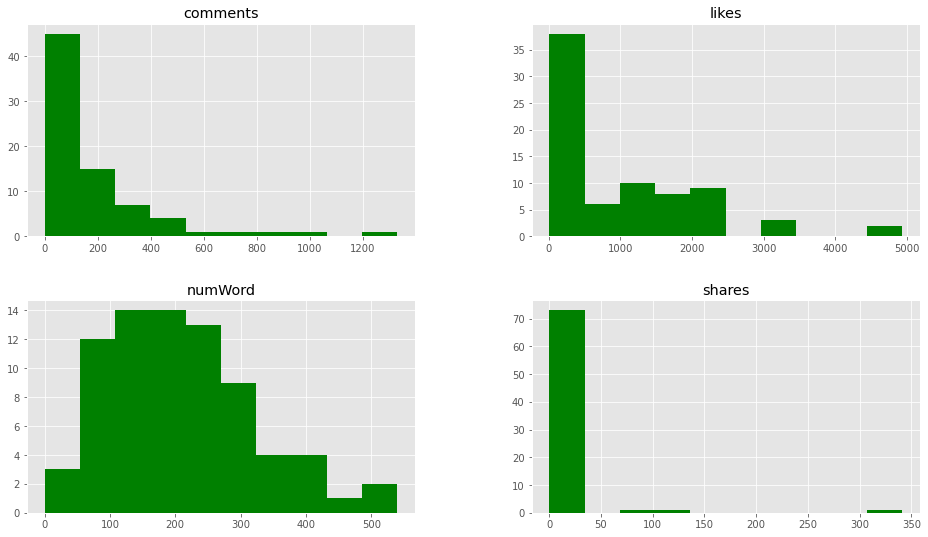

In [45]:
fb_posts.drop(['post_id','post_url', 'time'],1).hist(color='green')
plt.show()

*	Posteriormente se debe seguir un procesos de votación de eventos discretos que se describe a continuación:
*	Tomar los resultados de la regresión para la selección del candidato.
*	Se tiene una tendencia del 90% de personas que realizan el proceso de elección dentro del Ecuador.
*	Dentro del procesos se tiene que alrededor del 5% - 10% votan nulo.
*	Solo se va a tener en cuanta las elecciones de los asambleístas por el Azuay.
*	Las personas solo tiene un recinto electoral para realizar el proceso.
*	Las personas solo pueden realizar un proceso de elección por asambleísta del Azuay.
*	La persona se acerca a la mesa electoral y hacen fila en caso de ser necesario.
*	Realiza el voto en un tiempo aleatorio de un partido especifico.
*	La persona recibe su certificado votación.
*	La persona sale del recinto electoral.
*	Finalmente generar una grafica de las personas que votaron y los asambleístas electos.


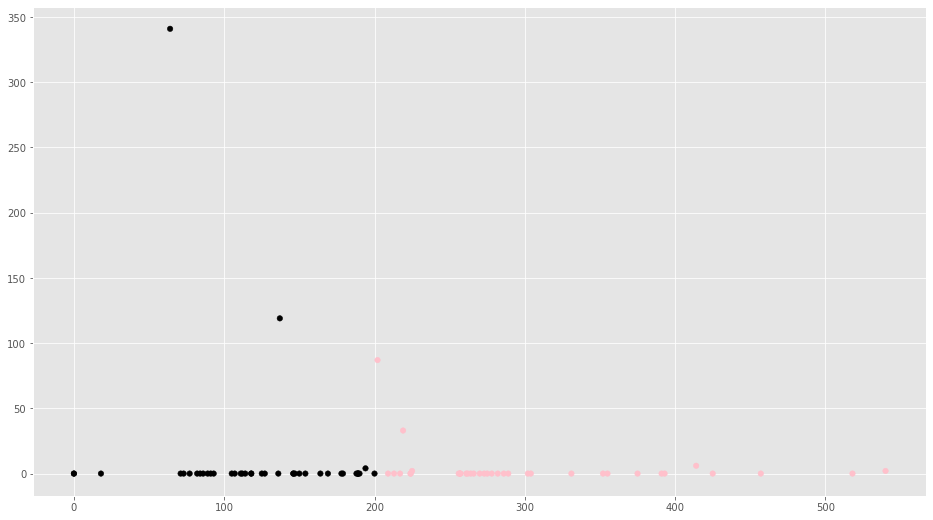

In [14]:
#Visualizamos la cantidad de palabras contra likes
colores=['pink','black']
tamanios=[30,60]

filtered_data = fb_posts[(fb_posts['numWord'] <= 4000) & (fb_posts['shares'] <= 90000)]

f1 = filtered_data['numWord'].values
f2 = filtered_data['shares'].values

asignar=[]
for index, row in filtered_data.iterrows():
    if(row['numWord']>200):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

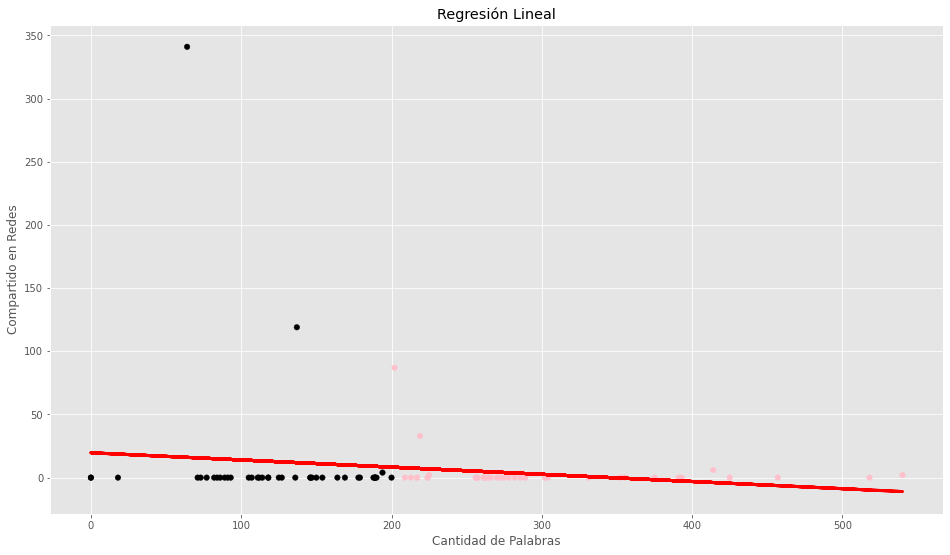

In [17]:
dataX =filtered_data[["numWord"]]
X_train = np.array(dataX)
y_train = filtered_data['shares'].values
 
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_train)
 
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Cantidad de Palabras')
plt.ylabel('Compartido en Redes')
plt.title('Regresión Lineal')

plt.show()

In [18]:
y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil))

-94


# Regresion multiples variables

In [19]:
suma = (filtered_data["likes"] + filtered_data['comments'].fillna(0))

dataX2 =pd.DataFrame()
dataX2["numWord"] = filtered_data["numWord"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data['shares'].values

In [20]:
regr2 = linear_model.LinearRegression()
regr2.fit(XY_train, z_train)
z_pred = regr2.predict(XY_train)
print('Coefficients: \n', regr2.coef_)
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [-0.05575536 -0.0009966 ]
Mean squared error: 1726.32
Variance score: 0.02


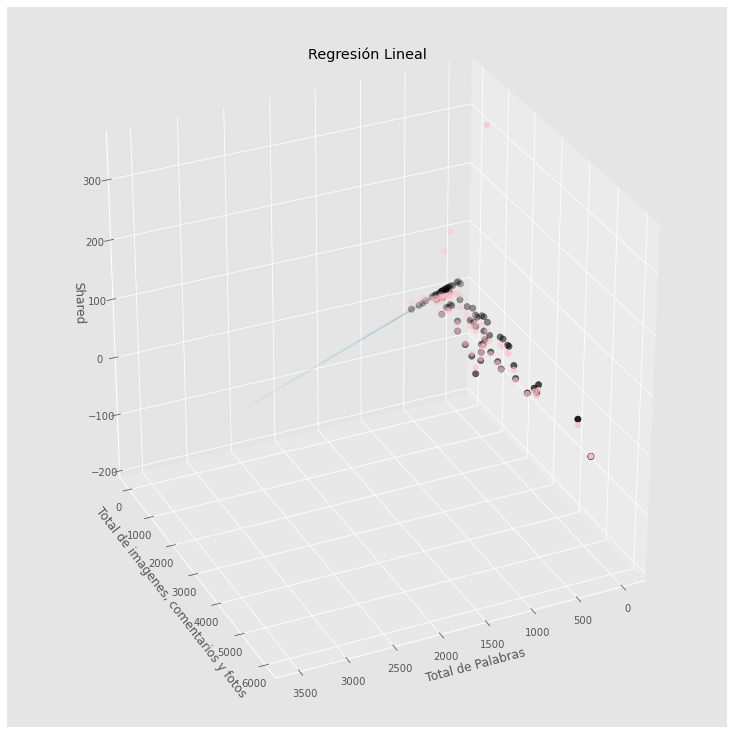

In [21]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy) 
z = (nuevoX + nuevoY + regr2.intercept_)
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='GnBu',)
#Graficos 3d
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='pink',s=30)
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='black',s=40)
 
# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=30., azim=65)
        
ax.set_xlabel('Total de Palabras')
ax.set_ylabel('Total de imagenes, comentarios y fotos')
ax.set_zlabel('Shared')
ax.set_title('Regresión Lineal')
plt.show()

In [22]:
z_Dosmil = regr2.predict([[2000, 10+4+6]])
print(int(z_Dosmil))

-90


# Simulacion

*	Se debe establecer un modelo basado en modelos matemáticos y probabilísticos para la predicción del numero de veces que se compartirá o la tendencia electoral basada en redes sociales.
*	El programa deberá generar gráficas que indiquen la ecuación matemática y probabilística de tendencias de votaciones.
*	Deben calcularse las siguientes métricas del sistema de simulación de eventos discretos :
*	Total de de personas que realizaron el proceso de votación.
*	Asambleístas ganadores.
*	El tiempo promedio de espera.

In [48]:
import random

random.seed(1)
lasso_digits = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
carrasco_digits = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lasso_win_pct = 69.13
carrasco_win_pct = 29.28
number_of_sims = 1000
total_wards = 0
total_carrasco_votes = 0
total_lasso_votes = 0
total_votes = 0
for i in range(number_of_sims):
    my_input = open('shares.txt')
    for line in my_input:
        total_wards += 1
        fields = line.strip().split()
        num_voters = int(fields[0])
        carrasco_votes_in_ward = 0
        lasso_votes_in_ward = 0
        for j in range(num_voters):
            random_num = random.random() * 100
            if random_num <= lasso_win_pct:
                lasso_votes_in_ward += 1
                total_lasso_votes += 1
            elif random_num <= (lasso_win_pct + carrasco_win_pct) :
                carrasco_votes_in_ward += 1
                total_carrasco_votes += 1
            total_votes += 1
        carrasco_digit = int(str(carrasco_votes_in_ward)[0])
        lasso_digit = int(str(lasso_votes_in_ward)[0])
        carrasco_digits[carrasco_digit] += 1
        lasso_digits[lasso_digit] += 1
    if i % 100 == 0:
        print('Simulacion con ', i)

carrasco_win_pct = 100.0 * total_carrasco_votes / total_votes
lasso_win_pct = 100.0 * total_lasso_votes / total_votes
print('Laso total:', carrasco_win_pct , '%')
print('Carrasco total:', lasso_win_pct, '%')

Simulacion con  0
Simulacion con  100
Simulacion con  200
Simulacion con  300
Simulacion con  400
Simulacion con  500
Simulacion con  600
Simulacion con  700
Simulacion con  800
Simulacion con  900
Laso total: 29.32895622895623 %
Carrasco total: 69.07037037037037 %


# Referencias 

[1]: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6291769/
[2]: https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/
[3]: https://eprints.ucm.es/48804/1/TFM%20Manuel%20Alejandro%20Rodriguez%20Santana.pdf
[4]: http://opac.pucv.cl/pucv_txt/txt-8000/UCC8094_01.pdf